#                       Esercitazione 4 - 12 Marzo 2023

Esplorate le caratteristiche dell'insieme dei numeri di macchina F($\beta$,t,L,U) sul vostro calcolatore utilizzando il comando sys.float_info, dopo aver importato im modulo sys:

import sys

print(sys.float_info)

In [73]:
import sys
import numpy as np
import matplotlib.pyplot as plt

print(sys.float_info)

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)


min_exp=-1021   (L=-1021-1=-1022)

max_exp=1024    (U=1024-1=1023)

mant_dig=53 (incluso l'hidden bit)

dig=15, significa che i numeri "float" vengono convertiti in stringhe con un massimo di 15 cifre decimali. Le cifre decimali oltre la quindicesima vengono eliminate (troncate). (solo a livello di stringa visualizzata)

- **1.**  Calcolare lo spacing in  $[2^{52}, 2^{53}]$.
    - Sia $x=2^{52}$ individuare il numero successivo a $2^{52}$ ed assegnarlo ad una variabile  y.
    - Cosa succede se consideriamo il valore z=x+0.5?
    - Cosa succede se consideriamo il valore q=y+0.5?
  

- **2** Calcolare la cardinalità dell'insieme dei numeri finiti di Python

- **3**  Verificare numericamente che $\texttt{eps} = 2^{-52}$, spacing nell'intervallo $[1, 2]$,
è il piu' piccolo $x$ tale che $fl(1 + x)$ è  diverso da $1$. 


- **4** Costruire un numpy array costituito da n=10 valori tutti uguali a 0.1
-     Effettuate la somma utilizzando un ciclo for.
-     Effettuate la somma effettuando la somma con la funzione sum del modulo numpy.
  Cosa osservate? Cercate di giustificare i risultati 

- **5.** Siano $a=1.234567890123400 e+15$, $b=-1.234567890123401 e+15$, $c=0.06$. 
  Calcolare $(a+b)+c$, $(a+c)+b$, $a+(b+c)$. Che cosa si osserva? Ripetere l'esercizio con $a=0.23371258 e-4$, $b=0.33678429 e+2$, $c=-0.33677911 e+2$.

- **6.** Si considerino le espressioni $y_1=\sqrt{x^2+1}-x$ e $y_2=\frac{1}{\sqrt{x^2+1}+x}$. Calcolare il valore di $y_1$ e $y_2$ per $x=7777$ e $x=77777777$. Che cosa si osserva? Commentare i risultati ottenuti.

- **7.** Valutare in aritmetica floating point l'espressione
$$A(x)=\frac{1}{x}-\frac{1}{(x+1)}$$  nel vettore   $x=[10^0, 10^1,... ,10^{20}]$ contenente potenze successive  di $10$,  Si calcoli per ogni elemento di x l'errore relativo considerando come valore esatto quello calcolato usando  l'espressione algebricamente equivalente
$$
B(x)=\frac{1}{x (x+1)}.
$$ Si visualizzi l'errore relativo in un grafico in scala logaritmica su $x$ e $y$

- **8-**  Risolvere l'equazione $x^2+10^k x+1=0$ con k in range(1,9). 

- Scrivere un codice Python che calcola le due radici: x1=(-b+sqrt(Delta))/2  e x2=(-b-sqrt(Delta))/2, dove Delta=b^2-4ac,  per tutti i valori di k in range(1,9)

- Calcolare l'errore relativo della soluzione numerica x1 rispetto alla soluzione in aritmetica reale, che per valori di k alti è  uguale a $10^{-k}$, altrimenti è una sua approssimazione. 

- Visualizzare l'errore relativo per ogni valore di k.

- Proporre un algoritmo aleternativo per il calcolo di una delle due soluzioni, che fornisca errore relativo inferiore.

- **9.** Scrivere uno script Matlab che fornisca le approssimazioni di $e=\exp(1)$ ottenute con la formula
$f(n)=(1/n+1)^n$ per $n=10^k$ e  $k=0, ..., 16$. 

Visualizzare  un grafico con i valori di $f(n)$ al variare di n ed un grafico con i valori dell'errore relativo (considerando come valore esatto il valore math.exp(1)).  Cosa si osserva? Commentare i risultati ottenuti.

In [36]:
#1
beta = 2
low_exp = 52
high_exp = low_exp + 1
x = beta ** low_exp
y = beta ** high_exp
spacing = lambda p, t, beta: beta ** (p + 1 - t)
arr, step = np.linspace(x, y, retstep=True) 
print(f"x = {x}\ny = {y} \nstep -> {step}")
print(f"spacing -> {spacing(low_exp, high_exp, beta)}")
z = x + 0.5
q = y + 0.5
print(f"\nz = {z}\nq = {q}")

x = 4503599627370496
y = 9007199254740992 
step -> 91910196476948.89
spacing -> 1

z = 4503599627370496.0
q = 9007199254740992.0


In [37]:
#2
cardinalita = lambda beta, t, L, U: 2 * (beta-1) * beta ** (t-1) + (U-L+1)
beta = 10
t = 15
U = -1022
L = 1023
print(cardinalita(beta, t, L, U))

1799999999997956


In [43]:
#3
eps = beta ** -low_exp
low = 0
high = 53
sp = spacing(low, high, beta)
print(f"spacing: {sp}")
print(f"fl(x + 1): {(sp + 1)}")

spacing: 1e-52
fl(x + 1): 1.0


In [42]:
#4
from functools import reduce

n = 10
sum_loop = lambda arr, sum: reduce(lambda a,b: a + b, arr) 
sum_num_py = lambda arr: np.sum(arr)

arr = np.repeat(0.1, n)
print(f"sum loop = {sum_loop(arr, 0)} sum py {sum_num_py(arr)}")

sum loop = 0.9999999999999999 sum py 1.0


In [65]:
#5
scale = lambda m, exp, beta: m * beta / (beta ** exp)
normalize = lambda x, beta: x / beta 
exp = 16
a=1.234567890123400e+15
b=-1.234567890123401e+15
c=scale(6e-3, 15, 10)

print(c)
ass1 = lambda a, b, c: (a+b)+c
print(ass(a,b,c))
ass2 = lambda a, b, c: (a+c)+b
print(ass2(a,b,c))
ass3 = lambda a, b, c: a + (b+c)
print(ass2(a,b,c))

6e-17
-0.9999999999999999
-1.0
-1.0


In [66]:
#6
y1 = lambda x: np.sqrt(x**2 + 1)
y2 = lambda x: 1 / y1(x) + x
x = 77777
print(f"x is {x}, y1: {y1(x)}, y2: {y2(x)}")
x = 77777777
print(f"x is {x}, y1: {y1(x)}, y2: {y2(x)}")

x is 77777, y1: 77777.00000642863, y2: 77777.00001285727
x is 77777777, y1: 77777777.0, y2: 77777777.00000001


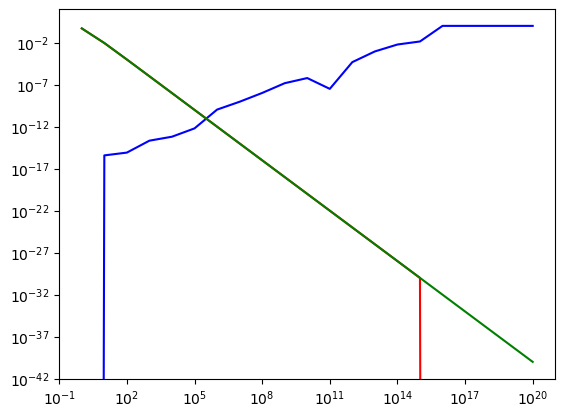

In [107]:
A = lambda x: (1 / x) - (1 / (x + 1))
B = lambda x: 1 / (x * (x + 1))

n = 20
x = 10.0 ** np.arange(21)
err = np.abs(A(x) - B(x)) / np.abs(B(x))
plt.loglog(x, err, 'b')
plt.loglog(x, A(x), 'r')
plt.loglog(x, B(x), 'g')


In [114]:
#8
def sol_equa_second(a, b, c):
    delta=np.abs(b**2-4*a*c)
    return (-b+np.sqrt(delta))/2, (-b-np.sqrt(delta))/2

k = 10
sol_equa_second(1, 10 * np.arange(k), 1)

(array([ 1.        , -0.10102051, -0.05012563, -0.03337045, -0.02501564,
        -0.02000801, -0.0166713 , -0.01428863, -0.01250195, -0.01111248]),
 array([ -1.        ,  -9.89897949, -19.94987437, -29.96662955,
        -39.97498436, -49.97999199, -59.9833287 , -69.98571137,
        -79.98749805, -89.98888752]))